# reading the data

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

csv_path = '../data/processed/data_struct.csv'

mail_data = pd.read_csv(csv_path, sep='|', quotechar = '"', usecols = ['category_first_level_number', 'category_number_combined', 'mail_text'])

# visualising the number of instances belonging to each of the categories

<Axes: xlabel='category_first_level_number', ylabel='count'>

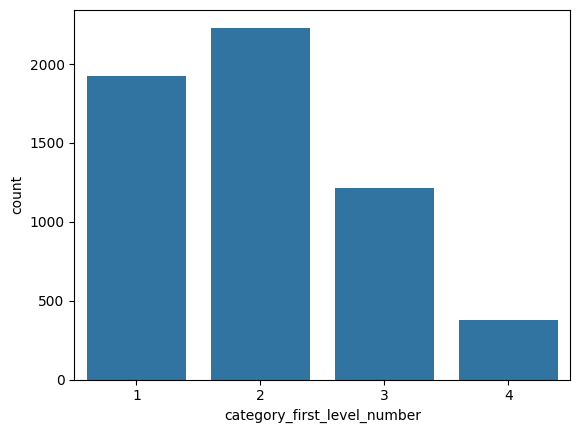

In [83]:
mail_data['category_first_level_number'].value_counts()

sns.countplot(x='category_first_level_number', data = mail_data)

<Axes: xlabel='category_number_combined', ylabel='count'>

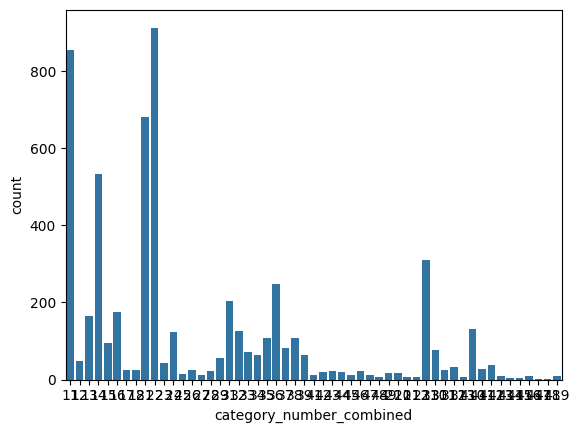

In [84]:
mail_data['category_number_combined'].value_counts()
sns.countplot(x='category_number_combined', data = mail_data)

# building the model

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB





mail_data['mail_text'] = mail_data['mail_text'].str.lower()

x = mail_data['mail_text']
y = mail_data['category_first_level_number']

assert x.shape[0] == y.shape[0], "Number of samples in x and y do not match."
print(x.shape[0])

5750


In [86]:
# splitting train and test data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

# TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# fitting and transforming the training data
x_train_tfidf = tfidf_vectorizer.fit_transform(x)


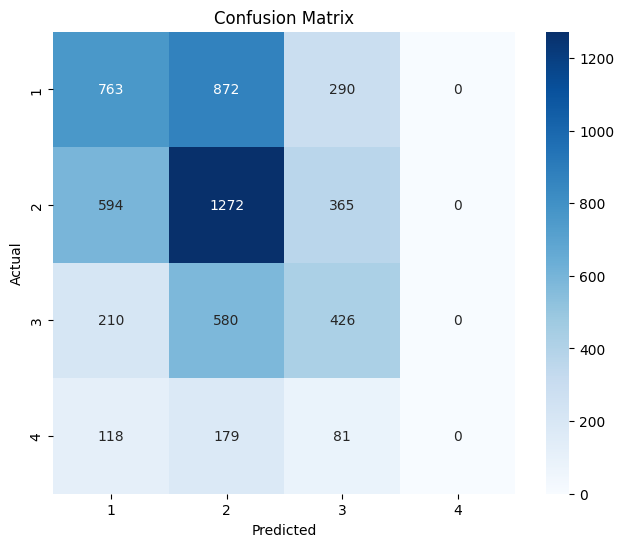

In [102]:
# cheating - using memorised values by matrix - no train/test splitting - used to play with different models and finding the best one

from sklearn.metrics import confusion_matrix

pipe = Pipeline([
    ('model', MultinomialNB())
])

pipe.fit(x_train_tfidf, y)

y_pred = pipe.predict(x_train_tfidf)


# the confusion matrix
confusion = confusion_matrix(y, y_pred)

# heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['1', '2', '3', '4'],
            yticklabels=['1', '2', '3', '4'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


plt.show()

# evaluating the model

In [103]:
print("Classification Report:")
print(classification_report(y, y_pred, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.40      0.42      1925
           2       0.44      0.57      0.50      2231
           3       0.37      0.35      0.36      1216
           4       1.00      0.00      0.00       378

    accuracy                           0.43      5750
   macro avg       0.56      0.33      0.32      5750
weighted avg       0.46      0.43      0.41      5750

